In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

In [ ]:
# !cp /content/drive/MyDrive/Tasks/14/complexification.zip ./
# !unzip --qq complexification.zip

error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from catboost import  CatBoostRegressor, Pool

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Tasks/14/complexification.zip (Unzipped Files)/complexification/train.csv', index_col=False)
val_df = pd.read_csv('/content/drive/MyDrive/Tasks/14/complexification.zip (Unzipped Files)/complexification/val.csv', index_col=False)
gt_df = pd.read_csv('/content/drive/MyDrive/Tasks/14/complexification.zip (Unzipped Files)/complexification/gt_val.csv', index_col=False)
test = pd.read_csv('/content/drive/MyDrive/Tasks/14/complexification.zip (Unzipped Files)/complexification/test.csv', index_col=False)
test_times = pd.read_csv('/content/drive/MyDrive/Tasks/14/complexification.zip (Unzipped Files)/complexification/test_times.csv', index_col=False)

In [ ]:
train_df.shape

(251594, 45)

In [ ]:
train_df.head()

,i,j,t,x,y,z,alpha,beta,gamma,s_x_x,s_x_y,s_x_z,s_x_alpha,s_x_beta,s_x_gamma,s_y_x,s_y_y,s_y_z,s_y_alpha,s_y_beta,s_y_gamma,s_z_x,s_z_y,s_z_z,s_z_alpha,s_z_beta,s_z_gamma,s_alpha_x,s_alpha_y,s_alpha_z,s_alpha_alpha,s_alpha_beta,s_alpha_gamma,s_beta_x,s_beta_y,s_beta_z,s_beta_alpha,s_beta_beta,s_beta_gamma,s_gamma_x,s_gamma_y,s_gamma_z,s_gamma_alpha,s_gamma_beta,s_gamma_gamma
0,0,1,0.000722,0.000000e+00,0.000000e+00,7.275958e-12,4.336809e-19,-0.000000,-7.582639e-18,0.000581,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.0,0.0,0.0,0.0,0.0,0.0,0.001602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0.005746,-1.722947e-07,-4.749745e-08,-1.525773e-05,8.805269e-05,-0.000070,6.983150e-05,0.000581,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.0,0.0,0.0,0.0,0.0,0.0,0.001602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0.010766,5.464162e-03,-3.217000e-03,-5.165538e-05,2.112110e-04,-0.000174,1.574136e-04,0.000581,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.0,0.0,0.0,0.0,0.0,0.0,0.001602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0.015762,1.018952e-02,4.810165e-03,-1.148362e-04,3.520220e-04,-0.000348,2.628551e-04,0.000581,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.0,0.0,0.0,0.0,0.0,0.0,0.001602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0.020773,1.018986e-02,4.810260e-03,-8.432072e-05,4.577270e-04,-0.000505,3.506001e-04,0.000581,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.0,0.0,0.0,0.0,0.0,0.0,0.001602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
track = 10

In [ ]:
gt = train_df[(train_df['i'] == track) & (train_df['j'] == 1)]
lidar = train_df[(train_df['i'] == track) & (train_df['j'] == 2)]
visual = train_df[(train_df['i'] == track) & (train_df['j'] == 3)]

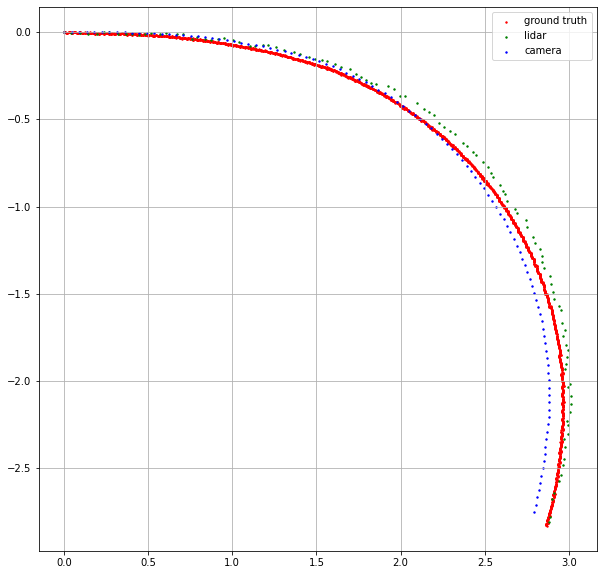

In [ ]:
plt.figure(figsize=[10, 10])
plt.grid()
plt.scatter(gt['x'], gt['y'], s=2, c='r', label="ground truth")
plt.scatter(lidar['x'], lidar['y'], s=2, c='g', label="lidar")
plt.scatter(visual['x'], visual['y'], s=2, c='b', label="camera")
plt.legend()

In [ ]:
val_df.shape

(6482, 45)

In [ ]:
val_df.head()

,i,j,t,x,y,z,alpha,beta,gamma,s_x_x,s_x_y,s_x_z,s_x_alpha,s_x_beta,s_x_gamma,s_y_x,s_y_y,s_y_z,s_y_alpha,s_y_beta,s_y_gamma,s_z_x,s_z_y,s_z_z,s_z_alpha,s_z_beta,s_z_gamma,s_alpha_x,s_alpha_y,s_alpha_z,s_alpha_alpha,s_alpha_beta,s_alpha_gamma,s_beta_x,s_beta_y,s_beta_z,s_beta_alpha,s_beta_beta,s_beta_gamma,s_gamma_x,s_gamma_y,s_gamma_z,s_gamma_alpha,s_gamma_beta,s_gamma_gamma
0,120,2,0.059948,0.000000,-8.881784e-16,0.000000,-1.084202e-19,-0.000000,7.064255e-18,0.000016,-2.229129e-07,-3.605896e-07,-6.430300e-08,-1.201817e-07,3.535619e-08,-2.229129e-07,0.000010,-2.034004e-07,1.534105e-07,-2.291625e-08,-3.795238e-08,-3.605896e-07,-2.034004e-07,0.000013,-1.523381e-07,1.160452e-07,-1.514682e-09,-6.430300e-08,1.534105e-07,-1.523381e-07,1.093638e-07,-2.390756e-08,-3.971283e-09,-1.201817e-07,-2.291625e-08,1.160452e-07,-2.390756e-08,8.064154e-08,-1.168728e-09,3.535619e-08,-3.795238e-08,-1.514682e-09,-3.971283e-09,-1.168728e-09,2.335324e-08
1,120,2,0.158337,0.034939,3.406026e-03,0.000562,5.783276e-05,-0.000020,-3.404055e-03,0.000016,-2.229129e-07,-3.605896e-07,-6.430300e-08,-1.201817e-07,3.535619e-08,-2.229129e-07,0.000010,-2.034004e-07,1.534105e-07,-2.291625e-08,-3.795238e-08,-3.605896e-07,-2.034004e-07,0.000013,-1.523381e-07,1.160452e-07,-1.514682e-09,-6.430300e-08,1.534105e-07,-1.523381e-07,1.093638e-07,-2.390756e-08,-3.971283e-09,-1.201817e-07,-2.291625e-08,1.160452e-07,-2.390756e-08,8.064154e-08,-1.168728e-09,3.535619e-08,-3.795238e-08,-1.514682e-09,-3.971283e-09,-1.168728e-09,2.335324e-08
2,120,2,0.258420,0.093264,4.457582e-03,0.002031,3.958651e-04,0.001657,-1.628888e-03,0.000015,1.684910e-09,-4.868117e-07,-5.104170e-08,-1.717879e-07,2.169606e-08,1.684910e-09,0.000009,-1.842286e-07,1.664474e-07,-4.479389e-08,-5.672740e-08,-4.868117e-07,-1.842286e-07,0.000013,-1.617118e-07,1.833978e-07,-1.979860e-09,-5.104170e-08,1.664474e-07,-1.617118e-07,1.140309e-07,-2.561364e-08,-3.224903e-09,-1.717879e-07,-4.479389e-08,1.833978e-07,-2.561364e-08,9.456706e-08,-1.081757e-09,2.169606e-08,-5.672740e-08,-1.979860e-09,-3.224903e-09,-1.081757e-09,2.210967e-08
3,120,2,0.358526,0.144218,-1.459082e-02,0.002970,4.149827e-04,0.001650,-2.876338e-03,0.000015,1.684910e-09,-4.868117e-07,-5.104170e-08,-1.717879e-07,2.169606e-08,1.684910e-09,0.000009,-1.842286e-07,1.664474e-07,-4.479389e-08,-5.672740e-08,-4.868117e-07,-1.842286e-07,0.000013,-1.617118e-07,1.833978e-07,-1.979860e-09,-5.104170e-08,1.664474e-07,-1.617118e-07,1.140309e-07,-2.561364e-08,-3.224903e-09,-1.717879e-07,-4.479389e-08,1.833978e-07,-2.561364e-08,9.456706e-08,-1.081757e-09,2.169606e-08,-5.672740e-08,-1.979860e-09,-3.224903e-09,-1.081757e-09,2.210967e-08
4,120,2,0.458613,0.183041,-1.091832e-02,-0.002470,3.283825e-03,0.004482,-5.495004e-03,0.000017,-2.755937e-07,-9.329765e-07,-1.466161e-07,-1.628008e-07,3.876844e-08,-2.755937e-07,0.000010,-2.892942e-07,1.950889e-07,-5.309294e-08,-4.005175e-08,-9.329765e-07,-2.892942e-07,0.000014,-1.475756e-07,2.608253e-07,9.194324e-09,-1.466161e-07,1.950889e-07,-1.475756e-07,1.266884e-07,-2.462463e-08,-2.687749e-09,-1.628008e-07,-5.309294e-08,2.608253e-07,-2.462463e-08,1.074010e-07,-2.384390e-10,3.876844e-08,-4.005175e-08,9.194324e-09,-2.687749e-09,-2.384390e-10,2.246783e-08


In [ ]:
gt_df.shape

(30, 5)

In [ ]:
gt_df.head()

,i,t,x,y,z
0,120,14.399907,3.330040,-4.454072,-0.023823
1,121,14.146461,3.507718,4.584109,-0.012769
2,122,5.153975,1.808241,-1.179792,-0.018907
3,123,9.277769,3.767988,0.754285,-0.000679
4,124,14.629049,3.948902,-4.325465,0.098568


In [ ]:
track = 120

In [ ]:
gt = gt_df[gt_df['i'] == track]
lidar = val_df[(val_df['i'] == track) & (val_df['j'] == 2)]
visual = val_df[(val_df['i'] == track) & (val_df['j'] == 3)]

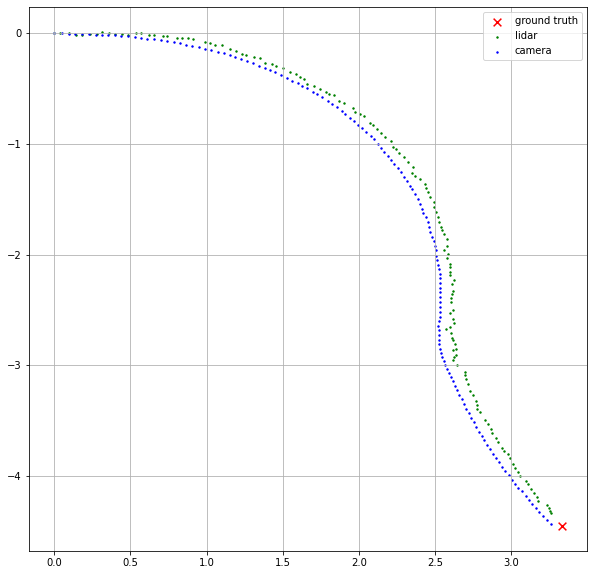

In [ ]:
plt.figure(figsize=[10, 10])
plt.grid()
plt.scatter(gt['x'], gt['y'], s=60, c='r', marker='x', label="ground truth")
plt.scatter(lidar['x'], lidar['y'], s=2, c='g', label="lidar")
plt.scatter(visual['x'], visual['y'], s=2, c='b', label="camera")
plt.legend()

Simple baseline - среднее в последний момент времени

In [ ]:
last = val_df.groupby(['i', 'j']).apply(lambda df: df[['x', 'y', 'z']].iloc[-1]).reset_index()

In [ ]:
last

,i,j,x,y,z
0,120,2,3.260446,-4.335969,-0.057776
1,120,3,3.259736,-4.435850,-0.081537
2,121,2,3.434010,4.606978,0.016182
3,121,3,3.487509,4.642874,-0.015829
4,122,2,1.781503,-1.190788,-0.032819
5,122,3,1.751405,-1.165288,-0.051078
6,123,2,3.681232,0.734386,-0.002486
7,123,3,3.724334,0.812178,-0.032028
8,124,2,3.928561,-4.284588,0.039633
9,124,3,3.828495,-4.192334,-0.018085


In [ ]:
last_mean = last.groupby('i').apply(lambda df: df.mean(axis=0)[['x', 'y', 'z']]).reset_index()

In [ ]:
last_mean

,i,x,y,z
0,120,3.260091,-4.385910,-0.069657
1,121,3.460759,4.624926,0.000176
2,122,1.766454,-1.178038,-0.041949
3,123,3.702783,0.773282,-0.017257
4,124,3.878528,-4.238461,0.010774
5,125,3.418874,0.360464,0.011399
6,126,-0.940591,-4.042084,0.046432
7,127,2.574943,-1.150058,-0.006450
8,128,4.914321,2.510981,-0.076915
9,129,2.239363,-3.293288,-0.022827


In [ ]:
last_mean.to_csv('submission.csv', index=False)

In [ ]:
pred = last_mean[last_mean['i'] == track]

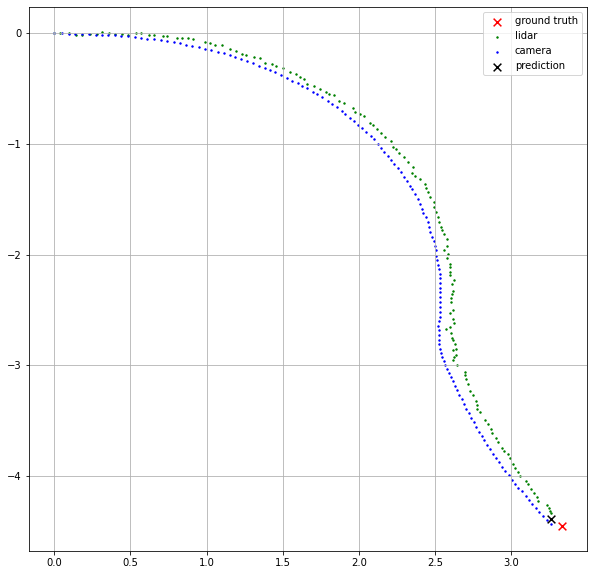

In [ ]:
plt.figure(figsize=[10, 10])
plt.grid()
plt.scatter(gt['x'], gt['y'], s=60, c='r', marker='x', label="ground truth")
plt.scatter(lidar['x'], lidar['y'], s=2, c='g', label="lidar")
plt.scatter(visual['x'], visual['y'], s=2, c='b', label="camera")
plt.scatter(pred['x'], pred['y'], s=60, c='k', marker='x', label="prediction")
plt.legend()

In [ ]:
np.sqrt(((last_mean - gt_df)[['x', 'y', 'z']] ** 2).sum(axis=1)).mean()

0.0798813483030175

Simple Baseline on test

In [ ]:
last = test.groupby(['i', 'j']).apply(lambda df: df[['x', 'y', 'z']].iloc[-1]).reset_index()

In [ ]:
last_mean = last.groupby('i').apply(lambda df: df.mean(axis=0)[['x', 'y', 'z']]).reset_index()

In [ ]:
last_mean.to_csv('submission.csv', index=False)

In [ ]:
last_mean

,i,x,y,z
0,150,3.934171,-0.760116,-0.029183
1,151,5.059813,-4.900959,-0.064860
2,152,7.912468,-2.556494,-0.001196
3,153,4.275095,5.899402,0.002621
4,154,0.374171,-6.930464,-0.011132
...,...,...,...,...
85,235,3.443931,-1.435800,0.006754
86,236,-0.910208,0.077315,0.006324
87,237,2.482083,-4.843075,0.267340
88,238,3.494329,0.584097,-0.092220


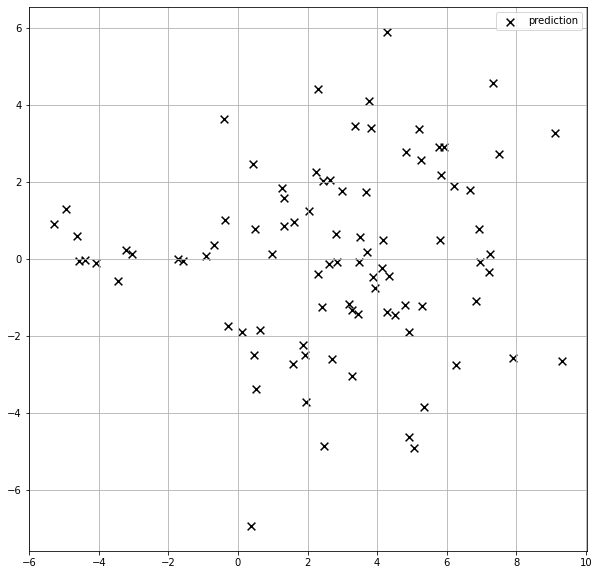

In [ ]:
plt.figure(figsize=[10, 10])
plt.grid()
# plt.scatter(gt['x'], gt['y'], s=60, c='r', marker='x', label="ground truth")
# plt.scatter(lidar['x'], lidar['y'], s=2, c='g', label="lidar")
# plt.scatter(visual['x'], visual['y'], s=2, c='b', label="camera")
plt.scatter(last_mean['x'], last_mean['y'], s=60, c='k', marker='x', label="prediction")
plt.legend()

In [ ]:
last_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       30 non-null     int64  
 1   x       30 non-null     float64
 2   y       30 non-null     float64
 3   z       30 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB
